# Heatmaps for 2018 MLB Batting Data

## Import neccesary modules

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

## Import Data

In [129]:
MLBAM18 = pd.read_csv("MLBAM18.csv")
MLBAM18.drop(['Unnamed: 0'], axis=1, inplace=True)
pd.set_option('display.max_columns', 100)
MLBAM18.head()

,inning,batterId,pitcherId,event,x,y,ab_num,timestamp,stand,throws,runnerMovement,half,balls,strikes,endOuts,actionId,description,game_type,home_team,home_teamId,home_lg,away_team,away_teamId,away_lg,venueId,stadium,field_teamId,playerId.1B,playerId.2B,playerId.3B,playerId.C,playerId.CF,playerId.LF,playerId.RF,playerId.SS,batterPos,batterName,pitcherName,runsOnPlay,startOuts,runsInInning,runsITD,runsFuture,start1B,start2B,start3B,end1B,end2B,end3B,outsInInning,startCode,endCode,fielderId,gameId,isPA,isAB,isHit,isBIP,our.x,our.y,r,theta
0,1,664023,570632,Home Run,233.22,70.48,1,2018-03-29 16:43:11,L,R,[664023:::T:Home Run],top,0,0,0,NaN,Ian Happ homers (1) on a fly ball to right fie...,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,CF,"Happ, I",Urena,1,0,3,0,3,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,True,True,False,270.081515,320.743636,419.309557,0.870937
1,1,592178,570632,Walk,NaN,NaN,2,2018-03-29 16:43:56,R,R,[592178::1B::Walk],top,4,2,0,NaN,Kris Bryant walks.,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,3B,Bryant,Urena,0,0,3,1,2,NaN,NaN,NaN,592178.0,NaN,NaN,3,0,1,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
2,1,519203,570632,Hit By Pitch,NaN,NaN,3,2018-03-29 16:46:24,L,R,[592178:1B:2B::Hit By Pitch][519203::1B::Hit B...,top,1,2,0,NaN,Anthony Rizzo hit by pitch. Kris Bryant to ...,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,1B,Rizzo,Urena,0,0,3,1,2,592178.0,NaN,NaN,519203.0,592178.0,NaN,3,1,3,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,False,False,False,NaN,NaN,NaN,NaN
3,1,575929,570632,Strikeout,NaN,NaN,4,2018-03-29 16:48:44,R,R,NaN,top,2,3,1,NaN,Willson Contreras strikes out swinging.,R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,C,Contreras,Urena,0,0,3,1,2,519203.0,592178.0,NaN,519203.0,592178.0,NaN,3,3,3,NaN,gid_2018_03_29_chnmlb_miamlb_1,True,True,False,False,NaN,NaN,NaN,NaN
4,1,656941,570632,Groundout,148.05,164.76,5,2018-03-29 16:52:10,L,R,[519203:1B:2B::Groundout][592178:2B:3B::Ground...,top,2,2,2,NaN,"Kyle Schwarber grounds out, first baseman Just...",R,mia,146,NL,chn,112,NL,4169,Marlins Park,146,571506,516770,605119,595453,621446,518618,643265,500743,LF,Schwarber,Urena,0,1,3,1,2,519203.0,592178.0,NaN,NaN,519203.0,592178.0,3,3,6,571506.0,gid_2018_03_29_chnmlb_miamlb_1,True,True,False,True,57.525216,85.451775,103.010467,0.978292


In [130]:
print(MLBAM18.columns.tolist())

['inning', 'batterId', 'pitcherId', 'event', 'x', 'y', 'ab_num', 'timestamp', 'stand', 'throws', 'runnerMovement', 'half', 'balls', 'strikes', 'endOuts', 'actionId', 'description', 'game_type', 'home_team', 'home_teamId', 'home_lg', 'away_team', 'away_teamId', 'away_lg', 'venueId', 'stadium', 'field_teamId', 'playerId.1B', 'playerId.2B', 'playerId.3B', 'playerId.C', 'playerId.CF', 'playerId.LF', 'playerId.RF', 'playerId.SS', 'batterPos', 'batterName', 'pitcherName', 'runsOnPlay', 'startOuts', 'runsInInning', 'runsITD', 'runsFuture', 'start1B', 'start2B', 'start3B', 'end1B', 'end2B', 'end3B', 'outsInInning', 'startCode', 'endCode', 'fielderId', 'gameId', 'isPA', 'isAB', 'isHit', 'isBIP', 'our.x', 'our.y', 'r', 'theta']


## Refine data to the columns we need

In [131]:
MLBmap = MLBAM18[['gameId','home_team','away_team','stadium','inning', 'batterId', 'batterName',\
                  'pitcherId', 'pitcherName','event','timestamp','stand', 'throws','x','y','our.x','our.y']]
MLBmap.head()

,gameId,home_team,away_team,stadium,inning,batterId,batterName,pitcherId,pitcherName,event,timestamp,stand,throws,x,y,our.x,our.y
0,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,664023,"Happ, I",570632,Urena,Home Run,2018-03-29 16:43:11,L,R,233.22,70.48,270.081515,320.743636
1,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,592178,Bryant,570632,Urena,Walk,2018-03-29 16:43:56,R,R,NaN,NaN,NaN,NaN
2,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,519203,Rizzo,570632,Urena,Hit By Pitch,2018-03-29 16:46:24,L,R,NaN,NaN,NaN,NaN
3,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,575929,Contreras,570632,Urena,Strikeout,2018-03-29 16:48:44,R,R,NaN,NaN,NaN,NaN
4,gid_2018_03_29_chnmlb_miamlb_1,mia,chn,Marlins Park,1,656941,Schwarber,570632,Urena,Groundout,2018-03-29 16:52:10,L,R,148.05,164.76,57.525216,85.451775


In [132]:
MLBmap['event'].unique()

array(['Home Run', 'Walk', 'Hit By Pitch', 'Strikeout', 'Groundout',
       'Single', 'Forceout', 'Lineout', 'Pop Out', 'Double',
       'Intent Walk', 'Grounded Into DP', 'Triple', 'Flyout',
       'Catcher Interference', 'Field Error', 'Sac Bunt', 'Sac Fly',
       'Double Play', 'Fielders Choice Out', 'Runner Out',
       'Strikeout - DP', 'Bunt Groundout', 'Fielders Choice',
       'Bunt Pop Out', 'Batter Interference', 'Bunt Lineout',
       'Fan interference', 'Triple Play', 'Sac Fly DP',
       'Sacrifice Bunt DP'], dtype=object)

## Heatmap for all balls put into play

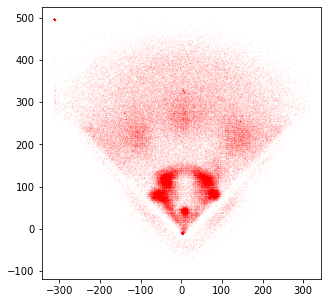

In [133]:
plt.rcParams['figure.figsize'] = (5,5)
plt.scatter(MLBmap['our.x'],MLBmap['our.y'], s=.001, c='r', marker= '.')

## Heatmap for all singles

Text(0.5, 0, 'Singles')

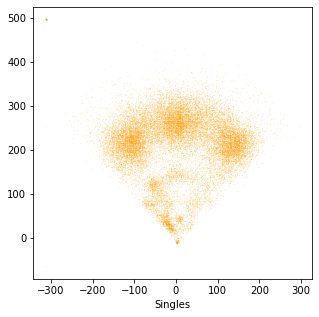

In [134]:
plt.rcParams['figure.figsize'] = (5,5)
Single = MLBmap[MLBmap.event == 'Single']
plt.scatter(Single['our.x'],Single['our.y'], s=.01,c='orange', marker= '.')
plt.xlabel("Singles")

## Heatmap for all doubles

Text(0.5, 0, 'Doubles')

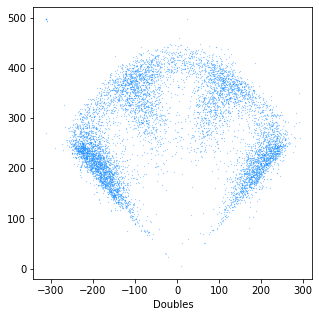

In [135]:
plt.rcParams['figure.figsize'] = (5,5)
Double = MLBmap[MLBmap.event == 'Double']
plt.scatter(Double['our.x'],Double['our.y'], s=.1,c='dodgerblue', marker= '.')
plt.xlabel("Doubles")

## Heatmap for all triples

Text(0.5, 0, 'Triples')

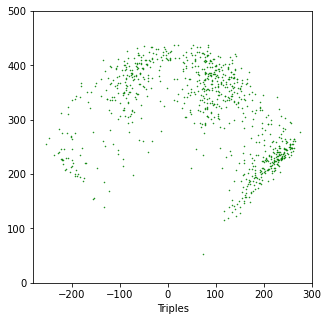

In [136]:
plt.rcParams['figure.figsize'] = (5,5)
Triple = MLBmap[MLBmap.event == 'Triple']
plt.scatter(Triple['our.x'],Triple['our.y'], s=1,c='green', marker= '.')
plt.ylim((0,500))
plt.xlabel("Triples")

## Heatmap for all homeruns

Text(0.5, 0, 'Homers')

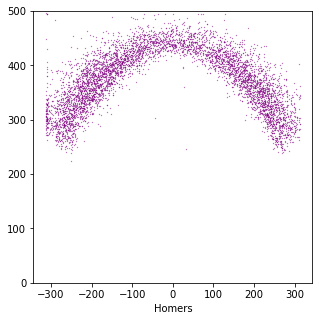

In [137]:
plt.rcParams['figure.figsize'] = (5,5)
Homer = MLBmap[MLBmap.event == 'Home Run']
plt.scatter(Homer['our.x'],Homer['our.y'], s=.2,c='purple',marker= '.')
plt.ylim((0,500))
plt.xlabel("Homers")

## Hit heatmaps side by side

(0.0, 500.0)

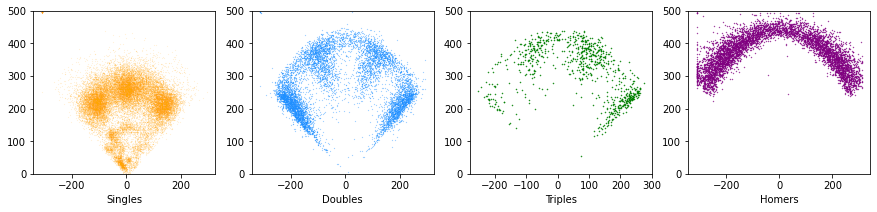

In [138]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(141)
ax=plt.scatter(Single['our.x'],Single['our.y'], s=.01,c='orange', marker= '.')
plt.xlabel("Singles")
plt.ylim((0,500))
ax = fig.add_subplot(142)
ax=plt.scatter(Double['our.x'],Double['our.y'], s=.1,c='dodgerblue', marker= '.')
plt.xlabel("Doubles")
plt.ylim((0,500))
ax = fig.add_subplot(143)
ax = plt.scatter(Triple['our.x'],Triple['our.y'], s=1,c='green', marker= '.')
plt.xlabel("Triples")
plt.ylim((0,500))
ax = fig.add_subplot(144)
ax = plt.scatter(Homer['our.x'],Homer['our.y'], s=.5,c='purple', marker= '.')
plt.xlabel("Homers")
plt.ylim((0,500))

## All in one heatmap

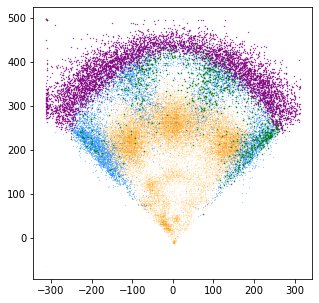

In [139]:
ax=plt.scatter(Single['our.x'],Single['our.y'], s=.01,c='orange', marker= '.')
ax=plt.scatter(Double['our.x'],Double['our.y'], s=.1,c='dodgerblue', marker= '.')
ax = plt.scatter(Triple['our.x'],Triple['our.y'], s=1,c='green', marker= '.')
ax = plt.scatter(Homer['our.x'],Homer['our.y'], s=.5,c='purple', marker= '.')

## Heatmap for all hits

Text(0.5, 0, 'Hits')

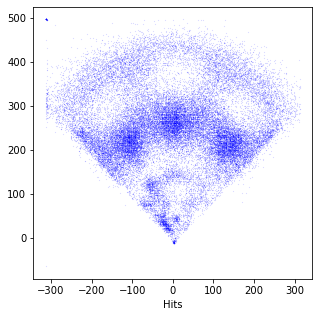

In [140]:
plt.rcParams['figure.figsize'] = (5,5)
Hits = MLBmap[(MLBmap.event == 'Single')|(MLBmap.event == 'Double')| (MLBmap.event == 'Triple')|
             (MLBmap.event == 'Home Run')]
plt.scatter(Hits['our.x'],Hits['our.y'], s=.01,c='b', marker= '.')
plt.xlabel("Hits")

## Heatmap for all outs

Text(0.5, 0, 'Outs')

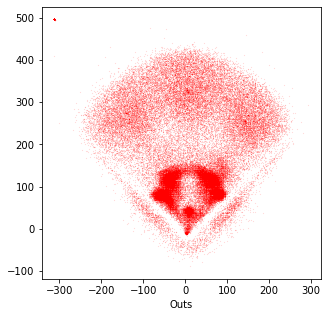

In [141]:
plt.rcParams['figure.figsize'] = (5,5)
Outs = MLBmap[(MLBmap.event == 'Groundout')|(MLBmap.event == 'Flyout')| (MLBmap.event == 'Pop Out')|
             (MLBmap.event == 'Forceout')|(MLBmap.event == 'Lineout')| (MLBmap.event == 'Grounded Into DP')]
plt.scatter(Outs['our.x'],Outs['our.y'], s=.01,c='r', marker= '.')
plt.xlabel("Outs")

## Hits vs Outs Heatmap

Text(0.5, 0, 'Outs vs Hits')

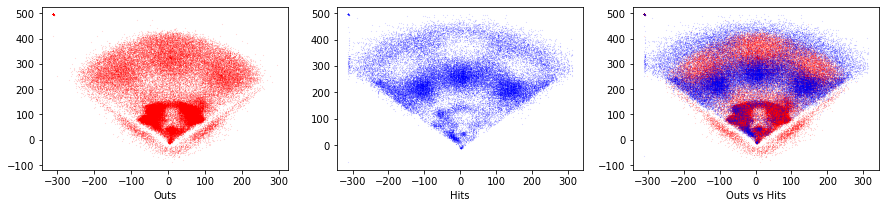

In [142]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(131)
ax=plt.scatter(Outs['our.x'],Outs['our.y'], s=.01,c='r', marker= '.')
plt.xlabel("Outs")

ax2 = fig.add_subplot(132)
ax2 = plt.scatter(Hits['our.x'],Hits['our.y'], s=.01,c='b', marker= '.')
plt.xlabel("Hits")

ax3 = fig.add_subplot(133)
ax3=plt.scatter(Outs['our.x'],Outs['our.y'], s=.01,c='r', marker= '.')
ax3=plt.scatter(Hits['our.x'],Hits['our.y'], s=.01,c='b', marker= '.')
plt.xlabel("Outs vs Hits")

## Summary list for stadiums

In [143]:
stadiums = MLBmap.groupby('stadium')['gameId'].count().reset_index()
stadiums

,stadium,gameId
0,AT&T Park,6172
1,Angel Stadium,3202
2,Angel Stadium of Anaheim,2878
3,BB&T Ballpark,75
4,Busch Stadium,6195
5,Chase Field,6229
6,Citi Field,6046
7,Citizens Bank Park,6069
8,Comerica Park,6095
9,Coors Field,6237


## Progressive Field vs Fenway Park Heatmap

Text(0.5, 0, 'Progressive vs Fenway')

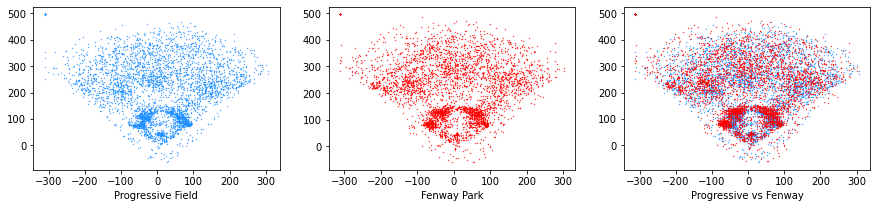

In [144]:
Fen = MLBmap[MLBmap.stadium == 'Fenway Park']
Prog = MLBmap[MLBmap.stadium == 'Progressive Field']

fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(131)
ax=plt.scatter(Prog['our.x'],Prog['our.y'], s=.5,c='dodgerblue', marker= '.')
plt.xlabel("Progressive Field")

ax2 = fig.add_subplot(132)
ax2=plt.scatter(Fen['our.x'],Fen['our.y'], s=.5,c='red', marker= '.')
plt.xlabel("Fenway Park")

ax3 = fig.add_subplot(133)
ax3 = plt.scatter(Prog['our.x'],Prog['our.y'], s=.5,c='dodgerblue', marker= '.')
ax3 = plt.scatter(Fen['our.x'],Fen['our.y'], s=.5,c='red', marker= '.')
plt.xlabel("Progressive vs Fenway")

## Comparing Players


In [145]:
playersn = MLBmap.groupby('batterId')['batterName'].describe().reset_index()
playersn.sort_values(by = 'count', ascending = False)

,batterId,count,unique,top,freq
696,607208,748,1,Turner,748
596,596019,747,1,Lindor,747
276,519317,714,1,Stanton,714
101,455976,710,1,Markakis,710
540,593160,709,1,Merrifield,709
...,...,...,...,...,...
434,571882,1,1,Law,1
435,571893,1,1,Liberatore,1
463,572403,1,1,VerHagen,1
470,572955,1,1,"Johnson, P",1


## Compare a right handed hitter with a left handed hitter

Text(0.5, 0, 'Markakis vs Turner')

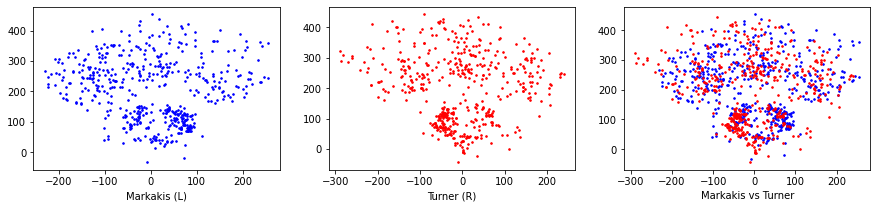

In [146]:
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(131)

# Left Handed - Markakis b607208 = MLBmap[MLBmap.batterId == 607208]
b455976 = MLBmap[MLBmap.batterId == 455976] # Markakis (L)
ax = plt.scatter(b455976['our.x'],b455976['our.y'], s=10,c='blue', marker= '.')
plt.xlabel("Markakis (L)")

# Right Handed - Turner
b607208 = MLBmap[MLBmap.batterId == 607208] # Turner (R)
ax2 = fig.add_subplot(132)
ax2 = plt.scatter(b607208['our.x'],b607208['our.y'], s=10,c='red', marker= '.')
plt.xlabel("Turner (R)")

# Markakis (L) vs Turner (R)
ax3 = fig.add_subplot(133)
ax3 = plt.scatter(b455976['our.x'],b455976['our.y'], s=10,c='blue', marker= '.')
ax3 = plt.scatter(b607208['our.x'],b607208['our.y'], s=10,c='red', marker= '.')
plt.xlabel("Markakis vs Turner")

## Heatmap for all lefties vs all righties

Text(0.5, 0, 'Left vs Right')

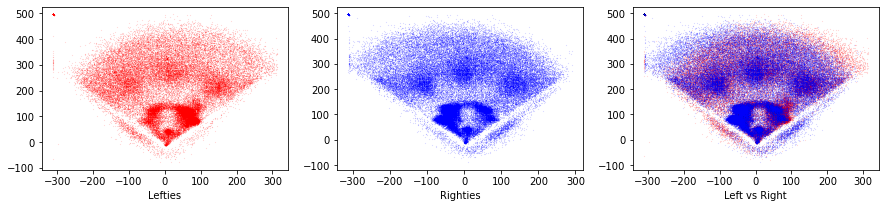

In [147]:
Left = MLBmap[MLBmap.stand == 'L']
Right = MLBmap[MLBmap.stand == 'R']

f = plt.figure(figsize=(15,3))
ax = f.add_subplot(131)
ax=plt.scatter(Left['our.x'],Left['our.y'], s=.01,c='r', marker= '.')
plt.xlabel("Lefties")

ax2 = f.add_subplot(132)
ax2=plt.scatter(Right['our.x'],Right['our.y'], s=.01,c='b', marker= '.')
plt.xlabel("Righties")

ax3 = f.add_subplot(133)
ax3 = plt.scatter(Left['our.x'],Left['our.y'], s=.01,c='r', marker= '.')
ax3 = plt.scatter(Right['our.x'],Right['our.y'], s=.01,c='b', marker= '.')
plt.xlabel("Left vs Right")